# Forth Activity (IC2)

**Professor: Ricardo Prudêncio**

Task:

(PT-BR)
1. Leitura recomendada: Capítulo "Interpretable Models" e "Global Surrogate" (pag 163) do livro do Molnar. 


2. Treinem um modelo caixa-preta (e.g., Random Forest ou outro modelo pra variar) para uma base de dados do seu interesse (menos o conjunto Diabetes :)). Crie um global surrogate caixa-branca (e.g., árvore de decisão), que simule esse modelo caixa-preta aprendido. Façam o upload do notebook.

3. Observe em que situações o Global Surrogate apresenta uma fidelidade alta em relação ao modelo caixa-preta.

Obs.: Podem reusar o notebook disponibilizado no material da aula.

(EN)
1. Recommended reading: Chapter "Interpretable Models" and "Global Surrogate" (page 163) from Molnar's book.

2. Train a black-box model (e.g., Random Forest or another model for variety) on a dataset of your choice (except the Diabetes dataset :)). Create a white-box global surrogate (e.g., decision tree) that simulates this learned black-box model. Upload the notebook.

3. Observe in which situations the Global Surrogate presents high fidelity in relation to the black-box model.

Note: You can reuse the notebook provided in the class materials.



## Base Notebook

### **Global Surrogates** (Do Not Run)

De uma forma geral, surrogate é um modelo substituto. No contexto de interpretabilidade, o surrogate é um modelo caixa-branca que simula as predições de um modelo caixa-preta. Podemos pensar em modelos surrogates globais ou locais, quando se deseja simular as predições de um modelo para todo um conjunto de dados ou apenas para uma determinada região em torno de uma instância específica que se deseja explicar. Nesse notebook, apresentamos os modelos surrogates globais.

In [ ]:
 """from google.colab import drive

drive.mount('/content/drive')"""

Mounted at /content/drive


In [ ]:
"""import pandas as pd
import numpy as np"""



**READING THE DATA FRAME**

In [ ]:
"""df = pd.read_csv('/content/drive/My Drive/datasets/diabetes.csv')

df.head()"""

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


**TRAINING EXAMPLES**

In [ ]:
"""from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)"""


**--- LEARNING THE RF CLASSIFIER**

Aprendendo o modelo

In [ ]:
"""from sklearn.inspection import PartialDependenceDisplay

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)"""

Agora usando o modelo para gerar predições

In [ ]:
"""Yhat = rf.predict(X_test)

Yhat"""

array(['tested_positive', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negati

**--- BUILDING THE SURROGATE MODEL**

Note que no modelo surrogate os atributos preditores continuam os mesmos mas o atributo alvo agora é a predição do modelo base que se deseja explicar. Nesse exmeplo, abaixo uma árvore de decisão é aprendida usando as predições do modelo base para os dados de teste.

In [ ]:
"""from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_leaf = 10)

dt.fit(X_test, Yhat)"""




DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10)

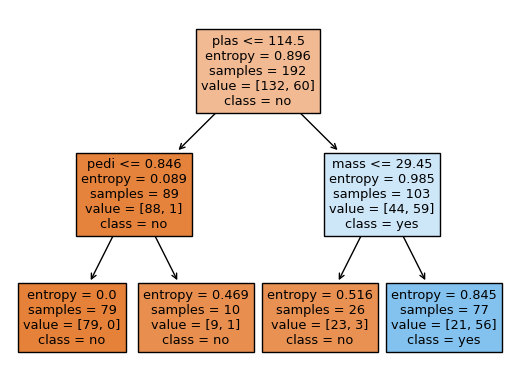

In [ ]:
"""from sklearn import tree


tree.plot_tree(dt, feature_names = X.columns, class_names=['no', "yes"],filled = True);"""

**Building the global surrogate from a cross-validation experiment**

In [ ]:
"""from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier()

Yhat = cross_val_predict(rf, X, Y, cv=10)

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_leaf = 10)

dt.fit(X, Yhat)"""


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10)

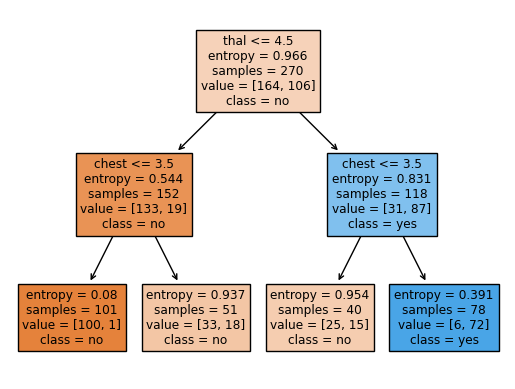

In [ ]:
"""tree.plot_tree(dt, feature_names = X.columns, class_names=['no', "yes"],filled = True);"""


Artificial Dataset - Blobs

In [ ]:
"""from sklearn.datasets import make_blobs

centers = [(0, 3), (3, 0)]

X, Y = make_blobs(n_samples=500, centers=centers, n_features=2,random_state=0)"""


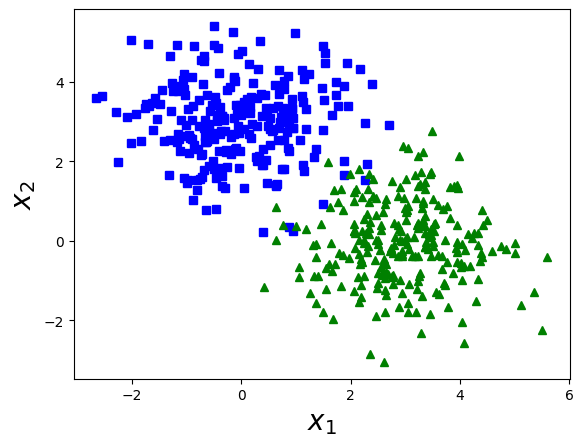

In [ ]:
"""from matplotlib import pyplot as plt

# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "bs")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()"""

Treinando RF com o conjunto de instâncias de treinamento

In [ ]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# lr = make_pipeline(StandardScaler(), LogisticRegression())

lr = LogisticRegression(max_iter = 1000)

lr.fit(X, Y)"""


LogisticRegression(max_iter=1000)

In [ ]:
"""from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,Y)"""



RandomForestClassifier()

Gerando uma grande quantidade de dados para verificar qual a superfície de separação definida pelo modelo RF

In [ ]:
"""n = 5000
xy_min = [-2, -2]
xy_max = [6, 6]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))"""


Gerando as predições do modelo RF e plotando

In [ ]:
"""Yhat = rf.predict(data)"""

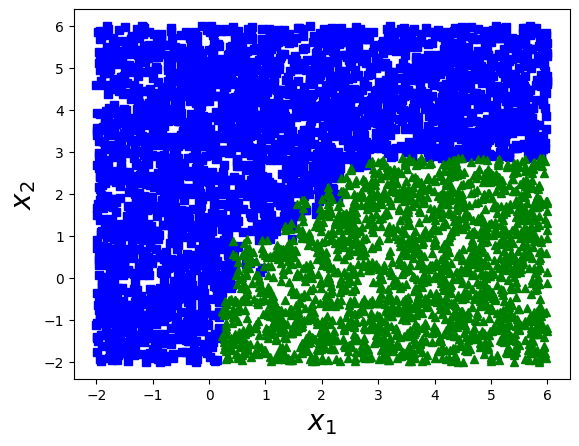

In [ ]:
"""# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat==0], data[:, 1][Yhat==0], "bs")
plt.plot(data[:, 0][Yhat==1], data[:, 1][Yhat==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()"""

Treinando o modelo surrogate com árvores de decisão

In [ ]:
"""from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 10)

dt.fit(data, Yhat)"""

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

Plotando as predições do modelo surrogate

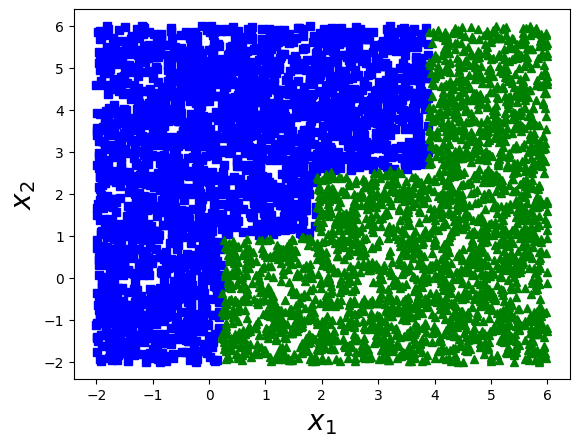

In [ ]:
"""Yhat2 = dt.predict(data)

# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat2==0], data[:, 1][Yhat2==0], "bs")
plt.plot(data[:, 0][Yhat2==1], data[:, 1][Yhat2==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()"""

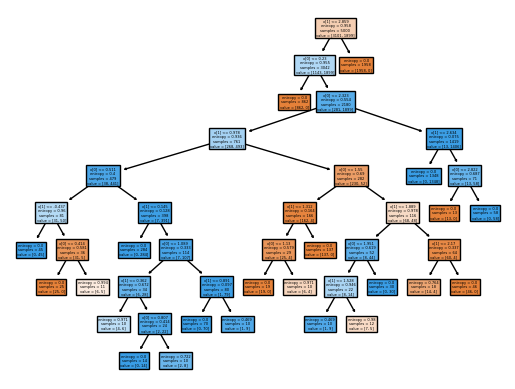

In [ ]:
"""from sklearn import tree


tree.plot_tree(dt,filled = True);"""

Obs.: a fronteira de classe do surrogate é uma aproximação da fronteira do modelo RF original. Mudando a profundidade da árvore de decisão faz com que a fronteira do surrogate fique mais ou menos alinhada com a fronteira do modelo base.

Building a global surrogate with logistic regression

In [ ]:

"""lr_surrogate = LogisticRegression(max_iter = 1000)


lr_surrogate.fit(data, Yhat)"""

LogisticRegression(max_iter=1000)

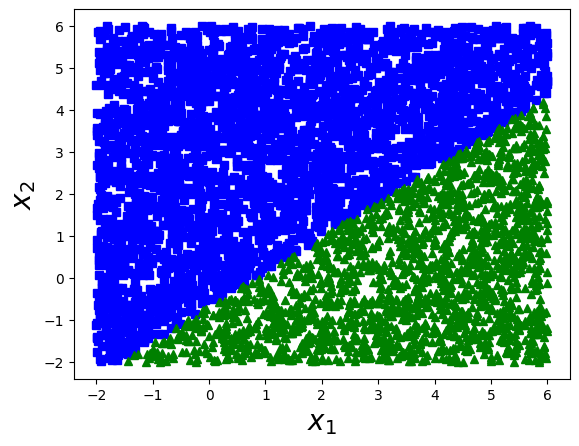

In [ ]:
"""Yhat2 = lr_surrogate.predict(data)

# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat2==0], data[:, 1][Yhat2==0], "bs")
plt.plot(data[:, 0][Yhat2==1], data[:, 1][Yhat2==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()"""

COMENTÁRIOS

1. O surrogate simula as predições de um modelo base, independente de estarem corretas ou não.

2. Em alguns casos, é possível até ter um bom ajuste de um modelo caixa-preta, para algumas regiões de dados. Essa é a base para modelos locais como LIME.

3. Um nó terminal de uma árvore de decisão é valida para um grupo de instâncias. Nesse sentido pode se falar de explocações "glocais".

## Resolution

For this exercise, just like for the First Activity, we are using the popular Housing Prices Dataset available on Kaggle.

The Housing Prices Dataset, often referred to as the Ames Housing dataset, is a popular dataset used in machine learning and data science for regression tasks. It includes detailed information on 1,460 houses sold in Ames, Iowa, between 2006 and 2010. The dataset features 79 explanatory variables that describe various aspects of the houses, such as the number of bedrooms, square footage, neighborhood, and year built. The target variable, SalePrice, represents the price each house sold for, making this dataset an excellent resource for modeling and predicting real estate prices based on a diverse set of factors.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree
import scipy

In [2]:
# Load the House Prices dataset that we have in our local machine (available on Kaggle Datasets)
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

We consider only the relevant attributes (regarding the Housing Prices Dataset).

In [3]:
# Prepare the data
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

In [4]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [5]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [7]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [8]:
# Create a pipeline with preprocessor and Random Forest
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, verbose=1))
])

In [9]:
# Fit the Random Forest model on the entire dataset
print("Fitting Random Forest model...")
rf.fit(X, y)

# Use cross-validation to get predictions
print("Performing cross-validation...")
Yhat = cross_val_predict(rf, X, y, cv=5)

Fitting Random Forest model...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s


Performing cross-validation...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Here, we have the predicted output for our Random Forest model, which we are going to use to train/fit our surrogate explainable model (decision tree).

In [10]:
Yhat

array([203222.75, 167779.32, 211251.09, ..., 258014.95, 134816.85,
       150736.  ])

Here, we arbitrarily exclude potentially important features, as a way to simplify how we can interpret our surrogate model and maybe explain the Housing Pricing behavior.

In [11]:
# Create a simplified dataset for the surrogate model
X_simplified = pd.DataFrame({
    'OverallQual': X['OverallQual'],
    'GrLivArea': X['GrLivArea'],
    'GarageCars': X['GarageCars'],
    'TotalBsmtSF': X['TotalBsmtSF'],
    'FullBath': X['FullBath']
})

In [12]:
X_simplified

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath
0,7,1710,2,856,2
1,6,1262,2,1262,2
2,7,1786,2,920,2
3,7,1717,3,756,1
4,8,2198,3,1145,2
...,...,...,...,...,...
1455,6,1647,2,953,2
1456,6,2073,2,1542,2
1457,7,2340,1,1152,2
1458,5,1078,1,1078,1


In [13]:
# Train a Decision Tree as a global surrogate model
dt_surrogate = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
dt_surrogate.fit(X_simplified, Yhat)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

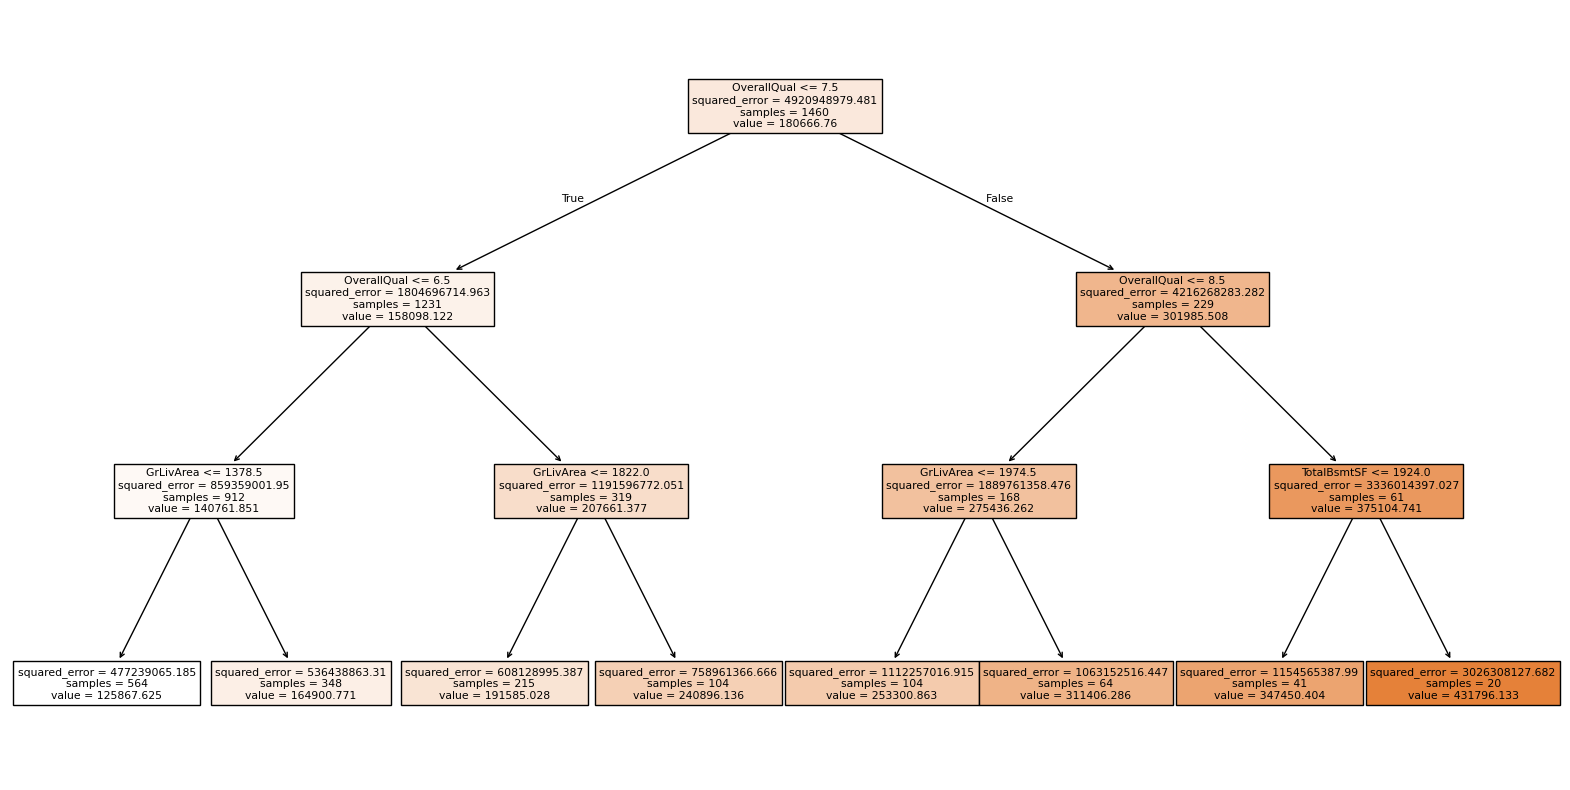

In [14]:
# Visualize the surrogate decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_surrogate, feature_names=X_simplified.columns, filled=True)
plt.show()

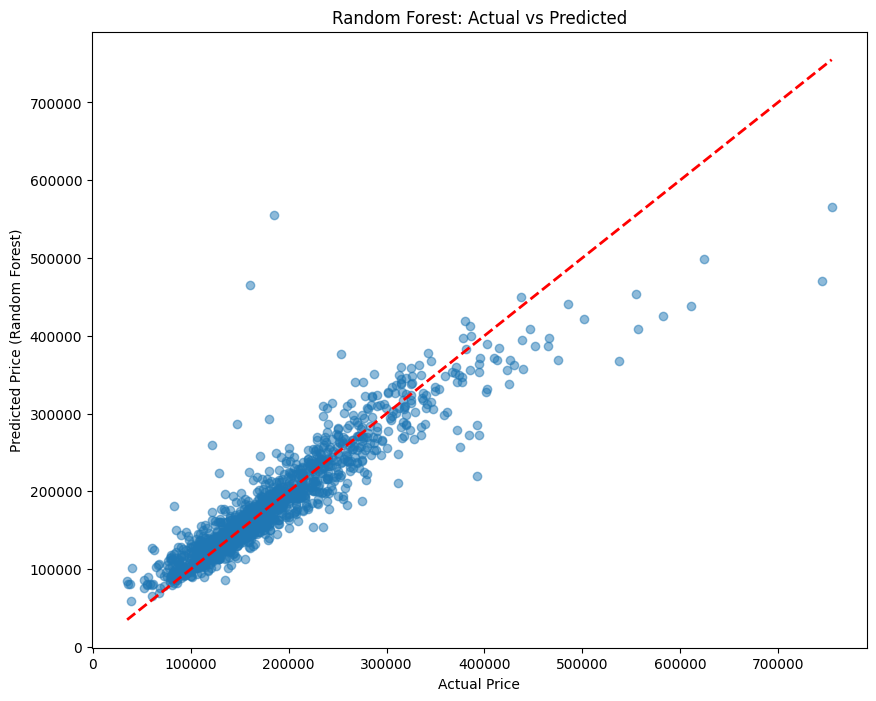

In [15]:
# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(10, 8))
plt.scatter(y, Yhat, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Random Forest)')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

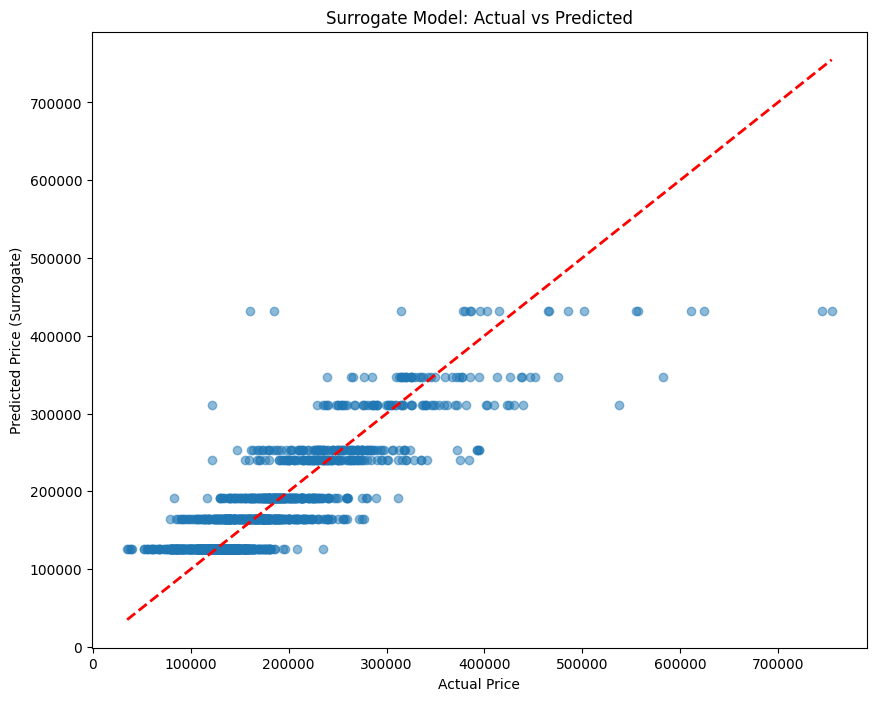

In [16]:
# Plot actual vs predicted values for Surrogate model
Yhat_surrogate = dt_surrogate.predict(X_simplified)
plt.figure(figsize=(10, 8))
plt.scatter(y, Yhat_surrogate, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Surrogate)')
plt.title('Surrogate Model: Actual vs Predicted')
plt.show()

In [17]:
# Calculate fidelity (R-squared between RF predictions and surrogate predictions)
fidelity = r2_score(Yhat, Yhat_surrogate)
print(f"Fidelity of the surrogate model: {fidelity:.2f}")

Fidelity of the surrogate model: 0.87


We got a score of 0.87, which means that the surrogate model (Decision Tree) explains about 87% of the variance in the predictions made by the Random Forest model. This is a relatively good values, which suggests that we could potentially use the simpler, more interpretable decision tree model to explain the general behavior of the Random Forest in many cases, without losing too much accuracy. Of course, this does not consider the actual performance of the Random Forest model, so we could be mimicking a completely inaccurate model.

In [18]:
# Calculate RMSE for both models
rmse_rf = np.sqrt(mean_squared_error(y, Yhat))
rmse_surrogate = np.sqrt(mean_squared_error(y, Yhat_surrogate))
print(f"RMSE of Random Forest: {rmse_rf:.2f}")
print(f"RMSE of Surrogate model: {rmse_surrogate:.2f}")

RMSE of Random Forest: 30274.63
RMSE of Surrogate model: 41898.95


In [19]:
# Analyze fidelity for different price ranges
price_ranges = pd.cut(y, bins=5)
for price_range in price_ranges.unique():
    mask = price_ranges == price_range
    fidelity_range = r2_score(Yhat[mask], Yhat_surrogate[mask])
    print(f"Fidelity for price range {price_range}: {fidelity_range:.2f}")

Fidelity for price range (178920.0, 322940.0]: 0.65
Fidelity for price range (34179.9, 178920.0]: 0.43
Fidelity for price range (322940.0, 466960.0]: 0.29
Fidelity for price range (466960.0, 610980.0]: -0.63
Fidelity for price range (610980.0, 755000.0]: -1.74


Be aware of the last value "Fidelity for price range (610980.0, 755000.0]: -1.74". It seems strange. Let's discuss this further on.

Now, instead of arbitrarily excluding potentially important features, we use all attributes, ensuring that the surrogate model has access to the same information as the original model to accurately mimic its behavior.

Training surrogate model...


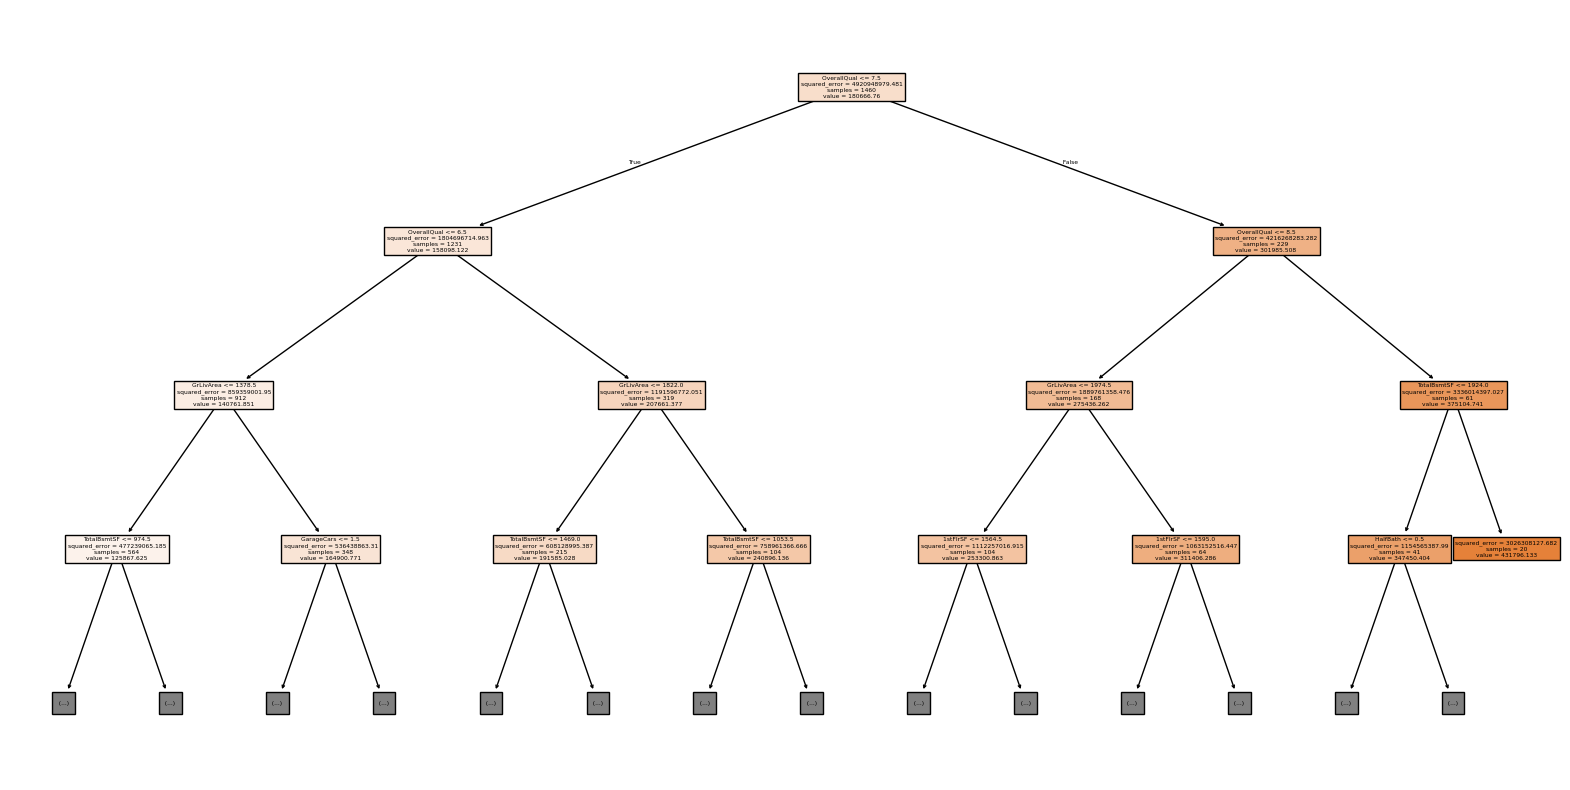

In [20]:
# Instead of creating X_simplified, we'll use the preprocessed X directly
X_preprocessed = rf.named_steps['preprocessor'].fit_transform(X)

# If X_preprocessed is a sparse matrix, convert it to a dense array
if scipy.sparse.issparse(X_preprocessed):
    X_preprocessed = X_preprocessed.toarray()

# Get feature names after preprocessing
feature_names = (rf.named_steps['preprocessor']
                 .named_transformers_['num'].get_feature_names_out().tolist() +
                 rf.named_steps['preprocessor']
                 .named_transformers_['cat'].get_feature_names_out().tolist())

# Train a Decision Tree as a global surrogate model
print("Training surrogate model...")
dt_surrogate = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)
dt_surrogate.fit(X_preprocessed, Yhat)

# Visualize the surrogate decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_surrogate, feature_names=feature_names, filled=True, max_depth=3)
plt.show()

# For the scatter plots, we'll use the surrogate model's predictions on the preprocessed data
Yhat_surrogate = dt_surrogate.predict(X_preprocessed)

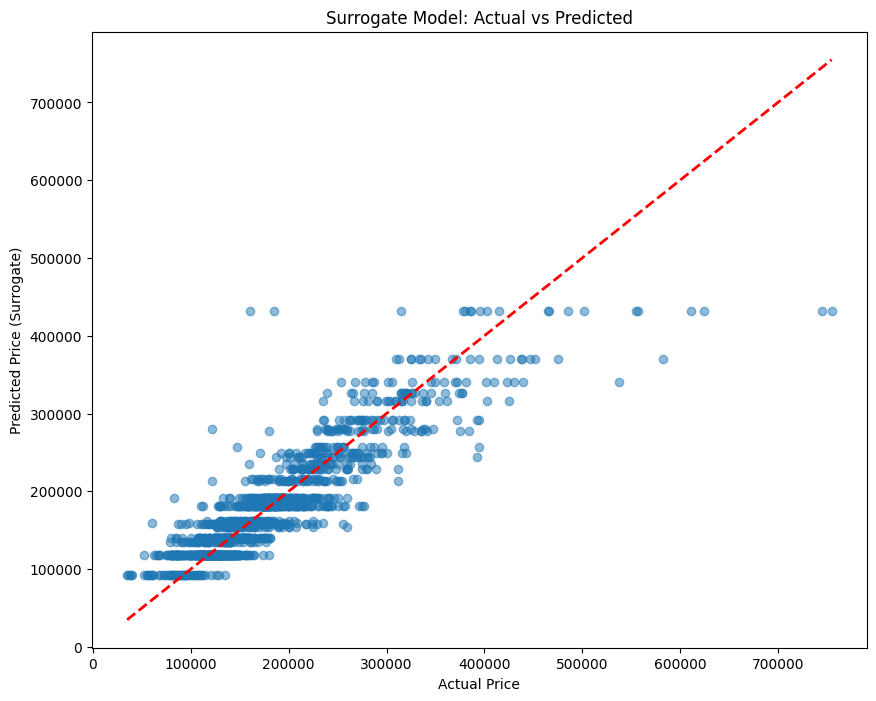

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(y, Yhat_surrogate, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Surrogate)')
plt.title('Surrogate Model: Actual vs Predicted')
plt.show()

In [22]:
# Calculate fidelity (R-squared between RF predictions and surrogate predictions)
fidelity = r2_score(Yhat, Yhat_surrogate)
print(f"Fidelity of the surrogate model: {fidelity:.2f}")

Fidelity of the surrogate model: 0.94


In [23]:
# Calculate RMSE for both models
rmse_rf = np.sqrt(mean_squared_error(y, Yhat))
rmse_surrogate = np.sqrt(mean_squared_error(y, Yhat_surrogate))
print(f"RMSE of Random Forest: {rmse_rf:.2f}")
print(f"RMSE of Surrogate model: {rmse_surrogate:.2f}")

RMSE of Random Forest: 30274.63
RMSE of Surrogate model: 35233.42


In [24]:
# Analyze fidelity for different price ranges
price_ranges = pd.cut(y, bins=5)
for price_range in price_ranges.unique():
    mask = price_ranges == price_range
    fidelity_range = r2_score(Yhat[mask], Yhat_surrogate[mask])
    print(f"Fidelity for price range {price_range}: {fidelity_range:.2f}")

Fidelity for price range (178920.0, 322940.0]: 0.87
Fidelity for price range (34179.9, 178920.0]: 0.78
Fidelity for price range (322940.0, 466960.0]: 0.56
Fidelity for price range (466960.0, 610980.0]: 0.26
Fidelity for price range (610980.0, 755000.0]: -1.74


We can see that the fidelity for price range (610980.0, 755000.0] is equal to -1.74 (the same as the oversimplified approach). A negative R-squared value, especially one as low as -1.74, is indeed unusual and indicates a significant issue. One of the possible reasons for this behavior is Overfitting (where the Random Forest could be overfitting to the training data, especially for high-priced houses which are likely fewer in number, failing dramatically for this price range). Let's see if this is true by plotting the distribution of the prices:



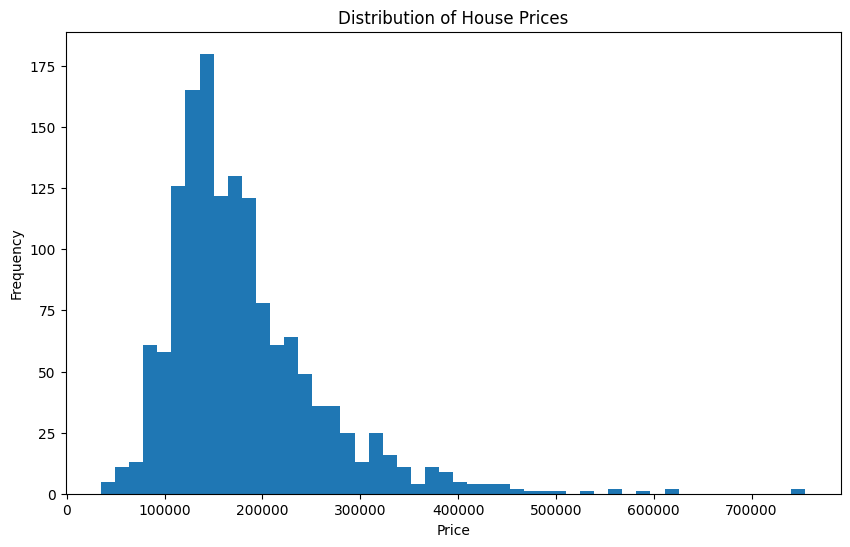

Price range (178920.0, 322940.0]:
  Number of samples: 508
  RF RMSE: 31018.15
  Surrogate RMSE: 33929.79
  Fidelity: 0.87

Price range (34179.9, 178920.0]:
  Number of samples: 871
  RF RMSE: 21085.66
  Surrogate RMSE: 25909.28
  Fidelity: 0.78

Price range (322940.0, 466960.0]:
  Number of samples: 70
  RF RMSE: 53335.19
  Surrogate RMSE: 58192.26
  Fidelity: 0.56

Price range (466960.0, 610980.0]:
  Number of samples: 7
  RF RMSE: 122951.07
  Surrogate RMSE: 138169.98
  Fidelity: 0.26

Price range (610980.0, 755000.0]:
  Number of samples: 4
  RF RMSE: 198250.68
  Surrogate RMSE: 260880.75
  Fidelity: -1.74



In [25]:
# Analyze the distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check the number of samples in each price range
for price_range in price_ranges.unique():
    mask = price_ranges == price_range
    n_samples = sum(mask)
    rf_rmse = np.sqrt(mean_squared_error(y[mask], Yhat[mask]))
    surrogate_rmse = np.sqrt(mean_squared_error(y[mask], Yhat_surrogate[mask]))
    print(f"Price range {price_range}:")
    print(f"  Number of samples: {n_samples}")
    print(f"  RF RMSE: {rf_rmse:.2f}")
    print(f"  Surrogate RMSE: {surrogate_rmse:.2f}")
    print(f"  Fidelity: {r2_score(Yhat[mask], Yhat_surrogate[mask]):.2f}")
    print()

As we could see, our hypothesis was confirmed. This behavior happens when the price range is accommodated within a really low frequency (only 4 samples). 

For analysis purposes, we might want to exclude this price range or merge it with the next lower range. That exactly what we do.

In [26]:
# Adjust binning strategy
price_ranges = pd.qcut(y, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Analyze each price range
for price_range in price_ranges.unique():
    mask = price_ranges == price_range
    n_samples = sum(mask)
    if n_samples > 10:  # Only calculate metrics if there are enough samples
        fidelity = r2_score(Yhat[mask], Yhat_surrogate[mask])
        mae = mean_absolute_error(Yhat[mask], Yhat_surrogate[mask])
        print(f"Price range {price_range}:")
        print(f"  Number of samples: {n_samples}")
        print(f"  Fidelity (R^2): {fidelity:.2f}")
        print(f"  Mean Absolute Error: {mae:.2f}")
    else:
        print(f"Price range {price_range}: Insufficient samples ({n_samples})")
    print()

# Overall fidelity excluding ranges with very few samples
mask_sufficient_samples = price_ranges.map(price_ranges.value_counts()) > 10
overall_fidelity = r2_score(Yhat[mask_sufficient_samples], Yhat_surrogate[mask_sufficient_samples])
print(f"Overall fidelity (excluding ranges with very few samples): {overall_fidelity:.2f}")

Price range High:
  Number of samples: 295
  Fidelity (R^2): 0.77
  Mean Absolute Error: 11277.92

Price range Low:
  Number of samples: 294
  Fidelity (R^2): 0.46
  Mean Absolute Error: 10043.53

Price range Very High:
  Number of samples: 289
  Fidelity (R^2): 0.85
  Mean Absolute Error: 17699.21

Price range Very Low:
  Number of samples: 295
  Fidelity (R^2): 0.44
  Mean Absolute Error: 11814.19

Price range Medium:
  Number of samples: 287
  Fidelity (R^2): 0.70
  Mean Absolute Error: 11193.02

Overall fidelity (excluding ranges with very few samples): 0.94


We can see that the overall fidelity remains the same 0.94, since it is calculated using all the data points, regardless of their price range. Also, all values, now, seem somewhat reasonable. Nevertheless, the individual analysis in ranges is more explainable, now:

In [27]:
price_range_details = pd.qcut(y, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], retbins=True)

# price_range_details[1] contains the bin edges
bin_edges = price_range_details[1]

# Create a DataFrame to display the range for each category
price_range_df = pd.DataFrame({
    'Category': ['Very Low', 'Low', 'Medium', 'High', 'Very High'],
    'Min Price': bin_edges[:-1],
    'Max Price': bin_edges[1:]
})

print(price_range_df)

# To specifically check the "Very High" range:
very_high_range = price_range_df[price_range_df['Category'] == 'Very High']
print("\nVery High Price Range:")
print(f"Minimum: ${very_high_range['Min Price'].values[0]:,.2f}")
print(f"Maximum: ${very_high_range['Max Price'].values[0]:,.2f}")

# You can also check the distribution of houses in each category
category_counts = price_ranges.value_counts().sort_index()
print("\nNumber of houses in each category:")
print(category_counts)

# Calculate the percentage of houses in each category
category_percentages = (category_counts / len(y)) * 100
print("\nPercentage of houses in each category:")
print(category_percentages)

    Category  Min Price  Max Price
0   Very Low    34900.0   124000.0
1        Low   124000.0   147000.0
2     Medium   147000.0   179280.0
3       High   179280.0   230000.0
4  Very High   230000.0   755000.0

Very High Price Range:
Minimum: $230,000.00
Maximum: $755,000.00

Number of houses in each category:
SalePrice
Very Low     295
Low          294
Medium       287
High         295
Very High    289
Name: count, dtype: int64

Percentage of houses in each category:
SalePrice
Very Low     20.205479
Low          20.136986
Medium       19.657534
High         20.205479
Very High    19.794521
Name: count, dtype: float64


We can see that for a Very High Price Range (aprox. 19.79%), ranged between 230000.0 and 755000.0, we have a fidelity of 85%, which means that, for this range, the surrogate models fairly explain 85% of the variation of the predicted values of the black-box model. 

We can see this distribution in the plot below:

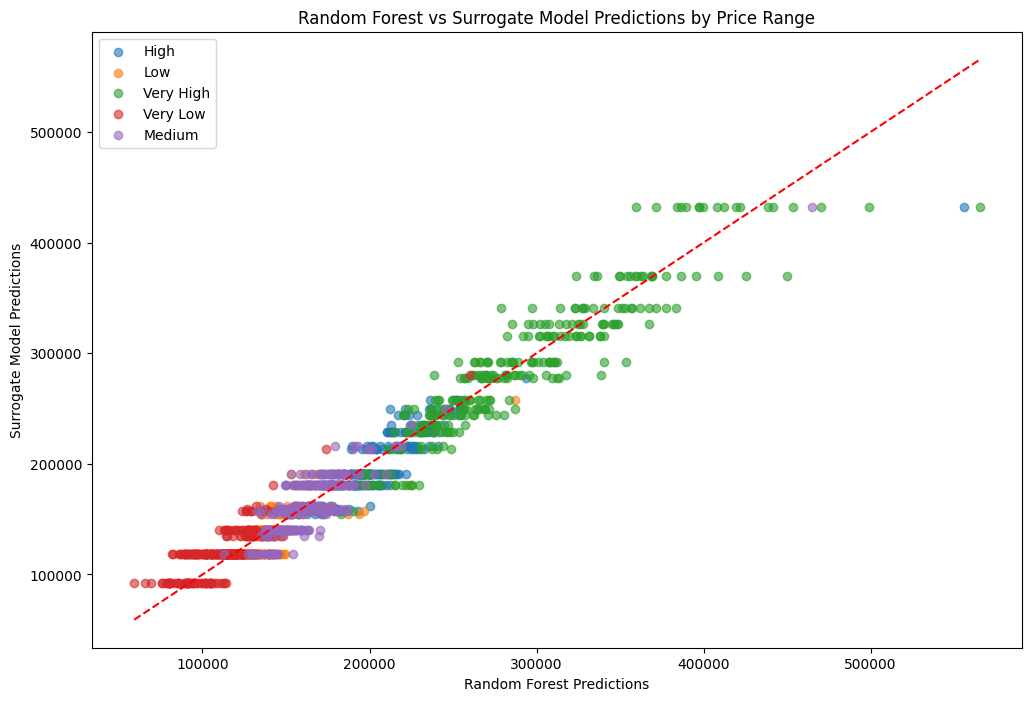

In [30]:
plt.figure(figsize=(12, 8))
for range_label in price_ranges.unique():
    mask = price_ranges == range_label
    plt.scatter(Yhat[mask], Yhat_surrogate[mask], label=range_label, alpha=0.6)
plt.plot([Yhat.min(), Yhat.max()], [Yhat.min(), Yhat.max()], 'r--')
plt.xlabel('Random Forest Predictions')
plt.ylabel('Surrogate Model Predictions')
plt.legend()
plt.title('Random Forest vs Surrogate Model Predictions by Price Range')
plt.show()

Notice that we have multiple low/medium fidelities in all different price ranges, still managing to have a big overall fidelity. This phenomenon is known as the "ecological fallacy" or "Simpson's paradox" in statistics. The surrogate model might be explaining a large portion of the overall variance in the Random Forest's predictions, even if it's not explaining much of the variance within each price range.